In [1]:
import os
os.chdir("florence_model_comparison_visualisation")
os.listdir()

['trash_percentage_50_text_encoder_florence2_base_attention_map_tensor.pt',
 'trash_percentage_50_vision_florence2_base_attention_map_tensor.pt',
 'fan_percentage_50_vision_llama32_vision_attention_map_tensor.pt',
 'trash_percentage_50_vision_florence2_large_attention_map_tensor.pt',
 'fan_percentage_50_text_encoder_florence2_base_attention_map_tensor.pt',
 'fan_percentage_50_vision_florence2_large_attention_map_tensor.pt',
 'comparison.ipynb',
 'trash_percentage_50_text_encoder_florence2_large_attention_map_tensor.pt',
 'vertopal.com_comparison.pdf',
 'fan_percentage_50_text_decoder_florence2_base_attention_map_tensor.pt',
 'fan_percentage_50_vision_global_llama32_vision_attention_map_tensor.pt',
 'fan_percentage_50_vision_florence2_base_attention_map_tensor.pt',
 'trash_percentage_50_text_decoder_florence2_large_attention_map_tensor.pt',
 'fan_percentage_50_text_encoder_florence2_large_attention_map_tensor.pt',
 'fan_percentage_50_text_decoder_florence2_large_attention_map_tensor.pt'

In [2]:
import torch 

base_model_tensors = {
    'fan':{
        'vision': torch.load('fan_percentage_50_vision_florence2_base_attention_map_tensor.pt'),
        'self-attn': torch.load('fan_percentage_50_text_encoder_florence2_base_attention_map_tensor.pt'),
        'cross-attn': torch.load('fan_percentage_50_text_decoder_florence2_base_attention_map_tensor.pt')
    },
    'trash':{
        'vision': torch.load('trash_percentage_50_vision_florence2_base_attention_map_tensor.pt'),
        'self-attn': torch.load('trash_percentage_50_text_encoder_florence2_base_attention_map_tensor.pt'),
        'cross-attn': torch.load('trash_percentage_50_text_decoder_florence2_base_attention_map_tensor.pt')
    }
}

/tmp/ipykernel_9443/2802633308.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  'vision': torch.load('fan_percentage_50_vision_florence2_base_attention_map_tensor.pt'),
/

In [3]:
large_model_tensors = {
    'fan':{
        'vision': torch.load('fan_percentage_50_vision_florence2_large_attention_map_tensor.pt'),
        'self-attn': torch.load('fan_percentage_50_text_encoder_florence2_large_attention_map_tensor.pt'),
        'cross-attn': torch.load('fan_percentage_50_text_decoder_florence2_large_attention_map_tensor.pt')
    },
    'trash':{
        'vision': torch.load('trash_percentage_50_vision_florence2_large_attention_map_tensor.pt'),
        'self-attn': torch.load('trash_percentage_50_text_encoder_florence2_large_attention_map_tensor.pt'),
        'cross-attn': torch.load('trash_percentage_50_text_decoder_florence2_large_attention_map_tensor.pt')
    }
}

/tmp/ipykernel_9443/1391189579.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  'vision': torch.load('fan_percentage_50_vision_florence2_large_attention_map_tensor.pt'),


In [4]:
base_model_tensors['fan']['vision'].shape, base_model_tensors['fan']['self-attn'].shape, base_model_tensors['fan']['cross-attn'].shape

(torch.Size([1, 9216, 256]),
 torch.Size([1, 584, 768]),
 torch.Size([3, 1, 768]))

In [5]:
large_model_tensors['fan']['vision'].shape, large_model_tensors['fan']['self-attn'].shape, large_model_tensors['fan']['cross-attn'].shape

(torch.Size([1, 9216, 512]),
 torch.Size([1, 584, 1024]),
 torch.Size([3, 1, 1024]))

In [6]:
!pip install umap-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [7]:
import torch

# Assuming your tensor is named 'data_tensor'
data = base_model_tensors['fan']['vision'].squeeze(0)  # Removes the first dimension [1, 9216, 256] → [9216, 256]

# If the tensor is on GPU, move to CPU and convert to NumPy
data_np = data.cpu().detach().numpy()

In [8]:
import umap.umap_ as umap

# Initialize UMAP reducer (customize parameters if needed)
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)

# Fit UMAP to the data and transform to 2D
embedding = reducer.fit_transform(data_np)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_np)
embedding = reducer.fit_transform(data_scaled)  # Use scaled data

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


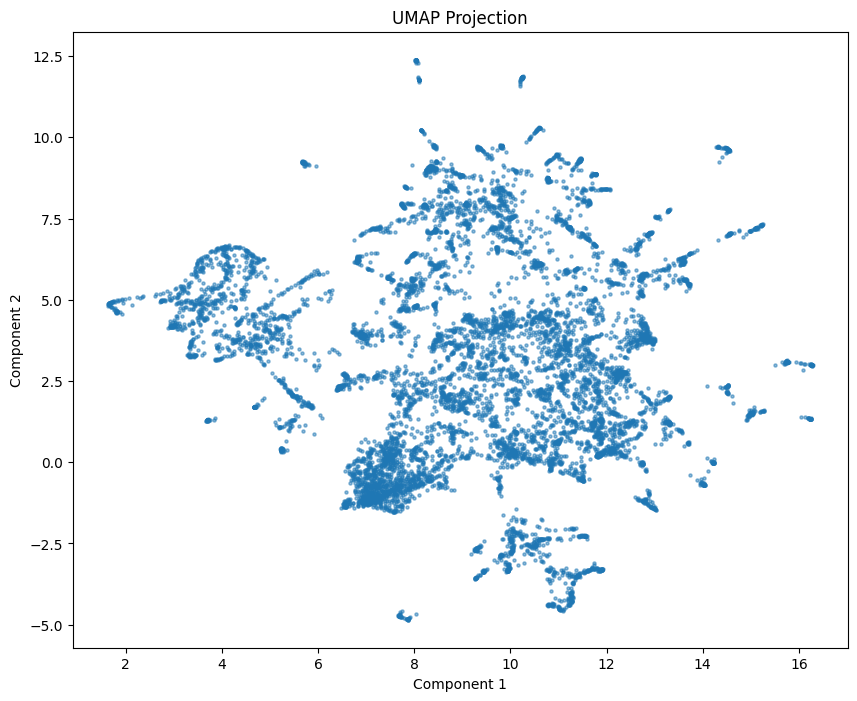

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.5)
plt.title("TEST UMAP Projection")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

---

In [11]:
import torch
import umap.umap_ as umap

def reduce_to_2d_umap(data_tensor, **umap_kwargs):
    """
    Converts a PyTorch tensor to a 2D UMAP embedding.
    
    Args:
        data_tensor: Input tensor with shape [batch_size, num_samples, num_features]
                     (batch_size should be 1)
        **umap_kwargs: Optional UMAP parameters (e.g., n_neighbors, min_dist)
    
    Returns:
        numpy.ndarray: 2D embedding with shape [num_samples, 2]
    """
    # Remove batch dimension and convert to NumPy
    data_np = data_tensor.squeeze(0).cpu().detach().numpy()
    
    # Force 2D output (override any n_components argument)
    umap_kwargs.pop('n_components', None)
    
    # Create and fit UMAP reducer
    reducer = umap.UMAP(n_components=2, **umap_kwargs)
    embedding = reducer.fit_transform(data_np)
    
    return embedding

In [12]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['fan']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [13]:
import matplotlib.pyplot as plt

def plot_embeddings_2d(embedding1, embedding2, 
                       labels=('Base Model', 'Large Model'),
                       colors=('blue', 'red'), 
                       alpha=0.5, s=5, figsize=(12, 8),
                       title='UMAP Projection Comparison'):
    """
    Plots two 2D embeddings in the same scatter plot with different colors.
    
    Args:
        embedding1: First 2D embedding should be from base model 
        embedding2: Second 2D embedding should be from large model 
        labels: Tuple of legend labels (default: ('Base Model', 'Large Model'))
        colors: Tuple of colors for each embedding (default: ('blue', 'red'))
        alpha: Transparency of points (0-1, default: 0.5)
        s: Marker size (default: 5)
        figsize: Figure size (default: (12, 8))
        title: Plot title (default: 'UMAP Projection Comparison')
    """
    plt.figure(figsize=figsize)
    
    # Plot first embedding
    plt.scatter(embedding1[:, 0], embedding1[:, 1], 
                c=colors[0], label=labels[0], 
                alpha=alpha, s=s)
    
    # Plot second embedding
    plt.scatter(embedding2[:, 0], embedding2[:, 1], 
                c=colors[1], label=labels[1], 
                alpha=alpha, s=s)
    
    plt.title(title)
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.legend(markerscale=2)  # Make legend markers larger than points
    plt.show()

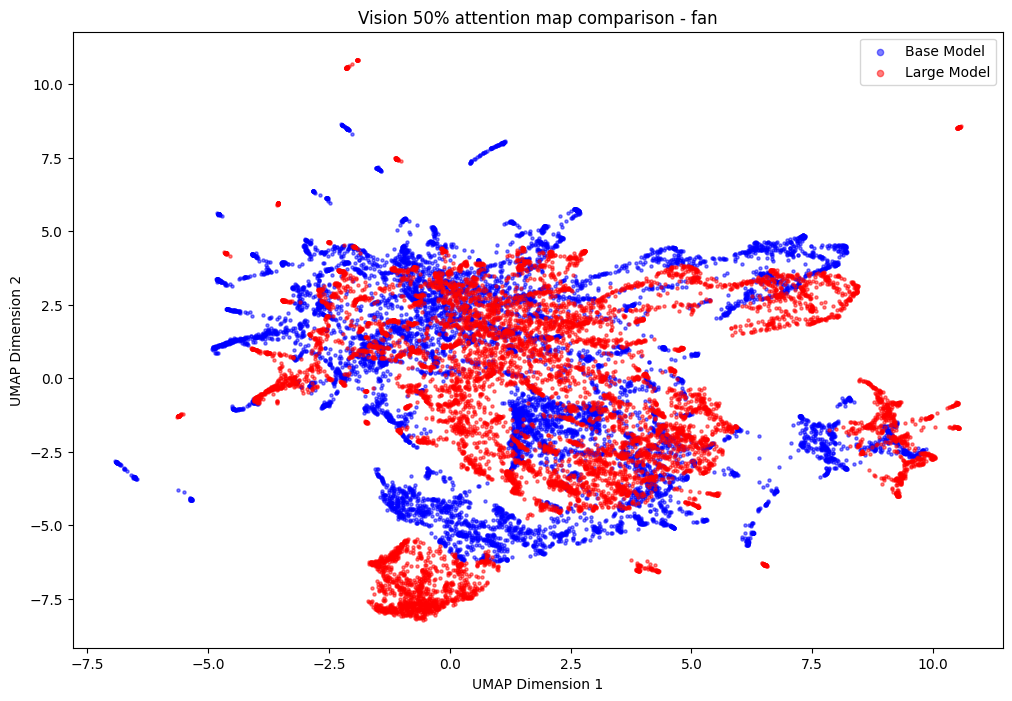

In [14]:
plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'Vision 50% attention map comparison - fan')

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


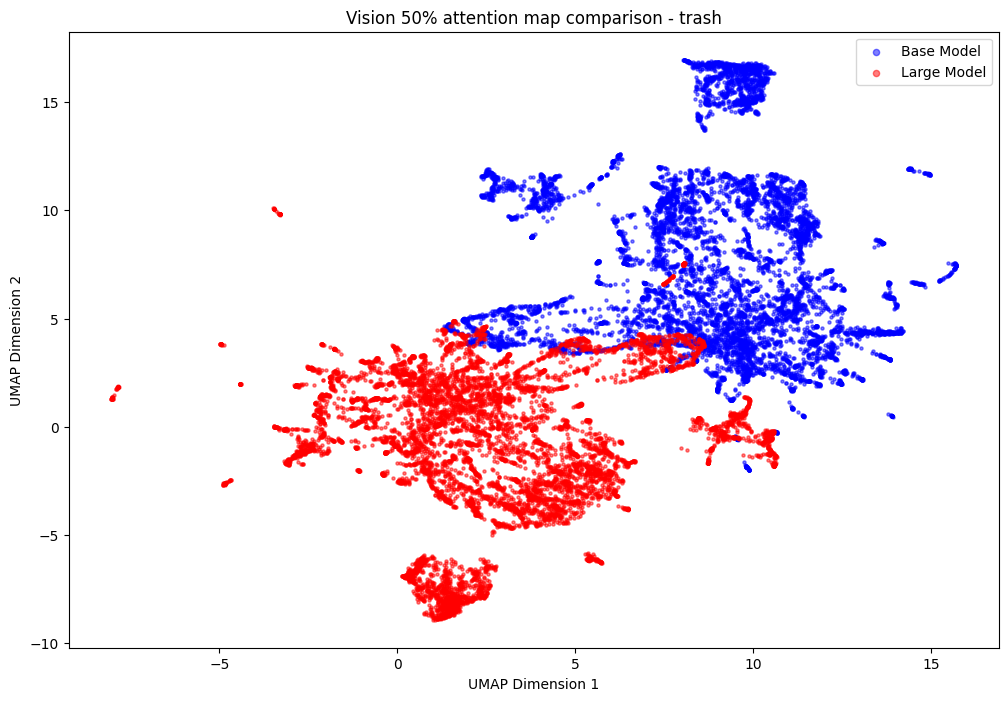

In [15]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['trash']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['trash']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'Vision 50% attention map comparison - trash')

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


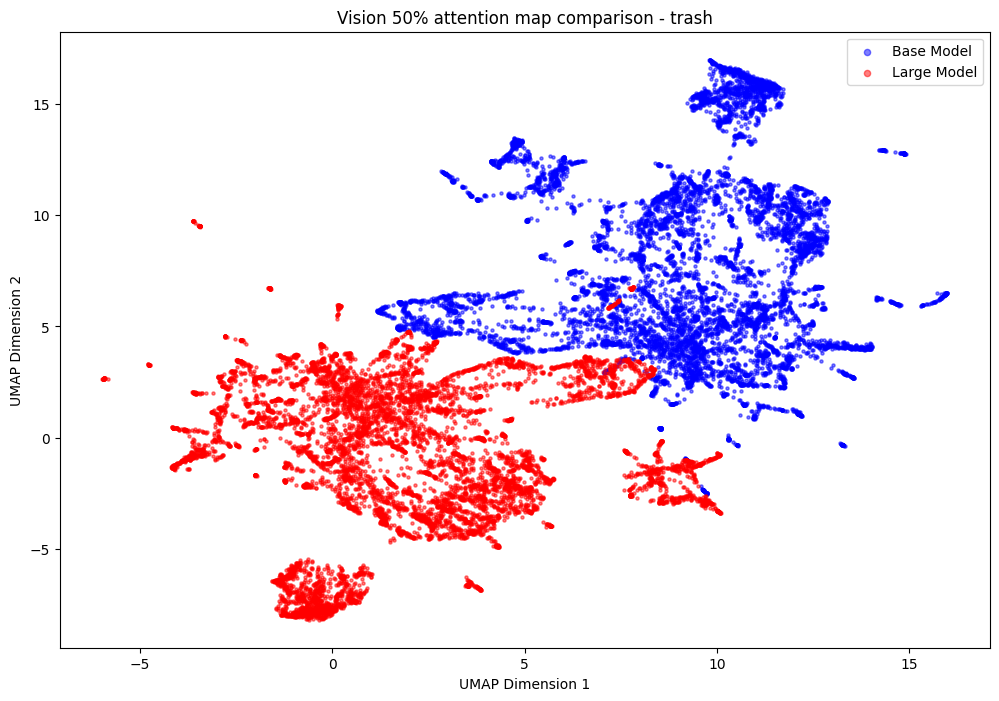

In [16]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['trash']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['trash']['vision'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'Vision 50% attention map comparison - trash')

## Self-attension maps

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


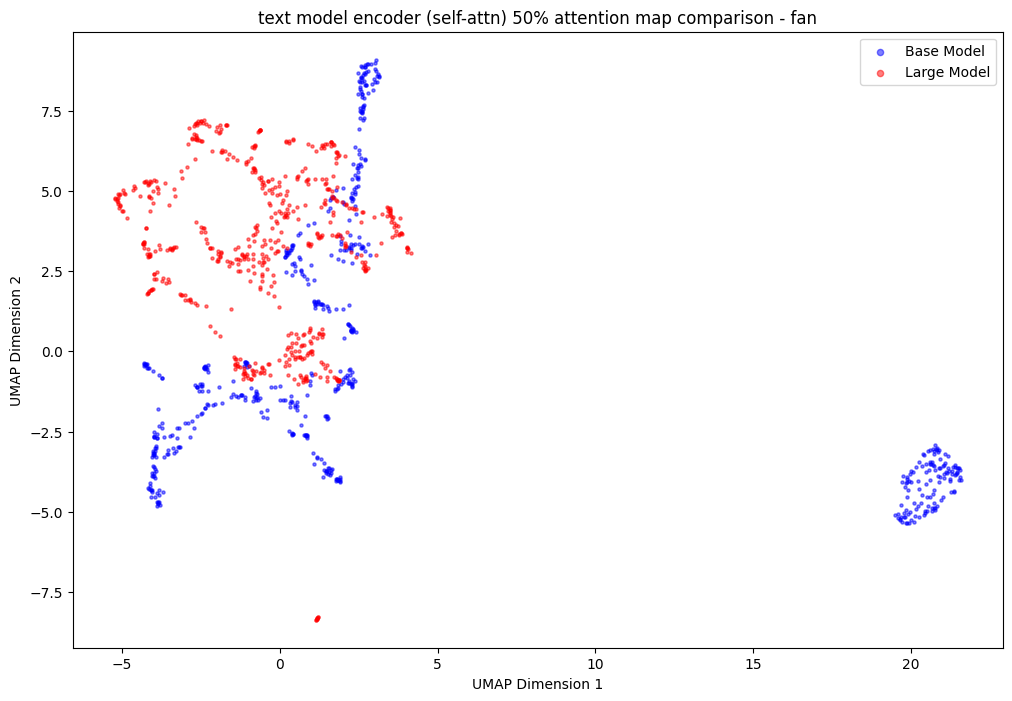

In [17]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'text model encoder (self-attn) 50% attention map comparison - fan')

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


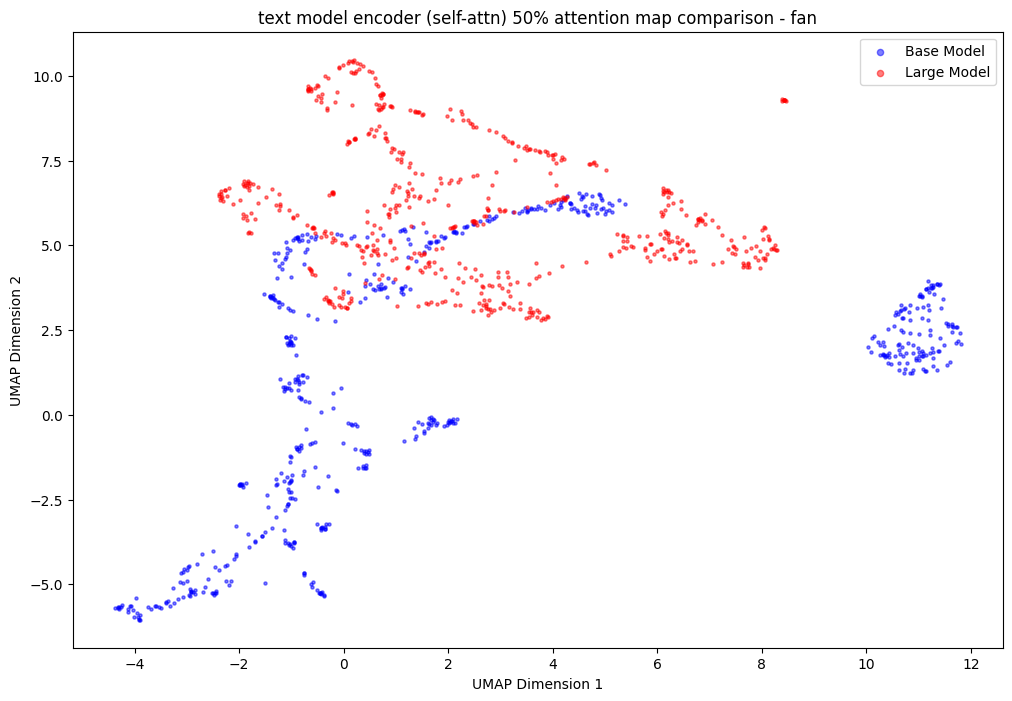

In [18]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'text model encoder (self-attn) 50% attention map comparison - fan')

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


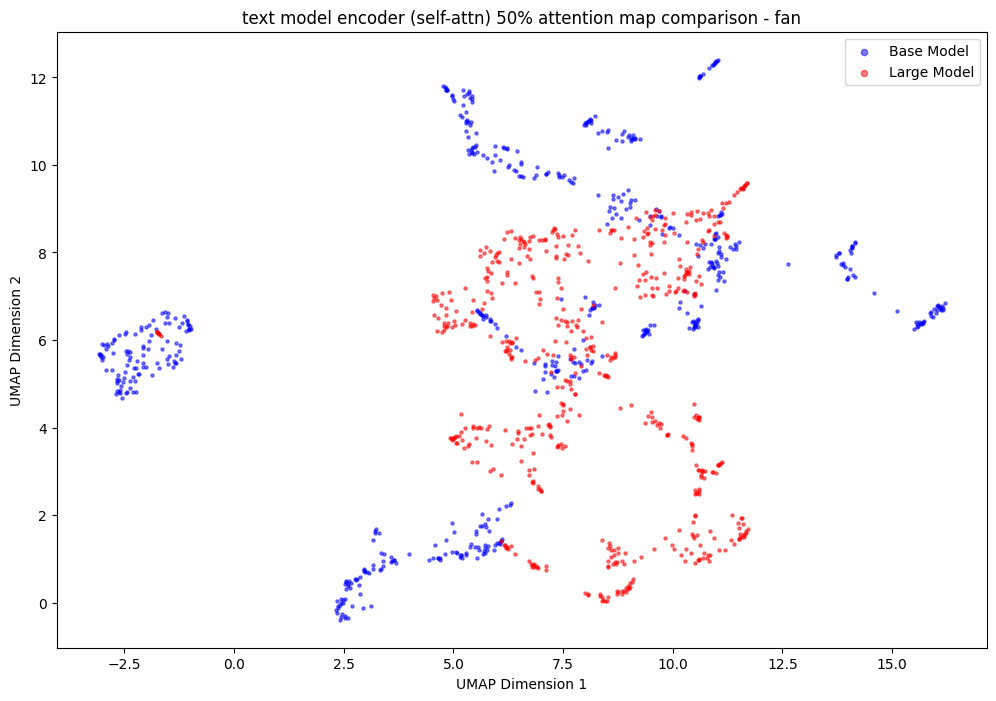

In [19]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['trash']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['trash']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'text model encoder (self-attn) 50% attention map comparison - fan')

### Cross Attention

In [20]:
base_model_tensors['fan']['cross-attn'].shape

torch.Size([3, 1, 768])

In [21]:
base_model_tensors['fan']['cross-attn'][0].shape

torch.Size([1, 768])

In [22]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['fan']['cross-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['cross-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'text model decoder (cross-attn) 50% attention map comparison - fan')

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ValueError: Found array with dim 3. None expected <= 2.

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


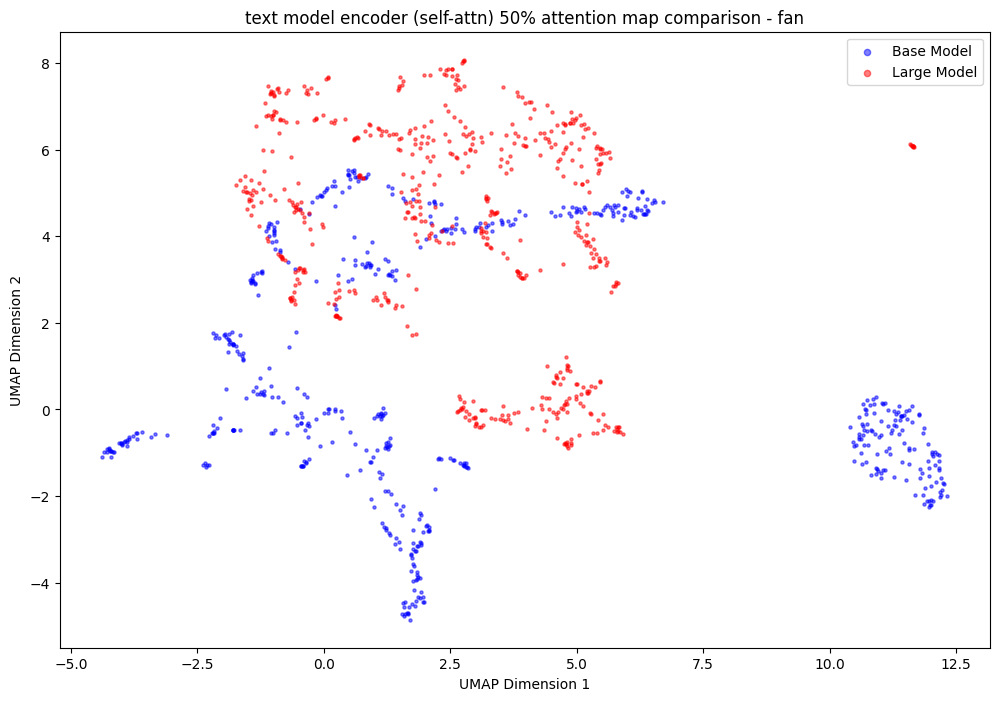

In [62]:
# Assuming your tensor is named `input_tensor` with shape [1, 9216, 256]
embedding_2d_base = reduce_to_2d_umap(
    base_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

# # To plot (requires matplotlib):
# import matplotlib.pyplot as plt
# plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1], s=2)
# plt.show()

plot_embeddings_2d(embedding_2d_base, embedding_2d_large, title=r'text model encoder (self-attn) 50% attention map comparison - fan')

---

---
## Llama vision Attention maps

In [27]:
# convert the tensor dtype from bfloat16 to float16
bfloat16_tensor = torch.load('fan_percentage_50_vision_llama32_vision_attention_map_tensor.pt')
bfloat16_tensor.dtype

/tmp/ipykernel_9443/2574218150.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  bfloat16_tensor = torch.load('fan_percentage_50_vision_llama32_vision_attention_map_tensor

torch.bfloat16

In [28]:
flat16_tensor = bfloat16_tensor.to(torch.float16)

/tmp/ipykernel_9443/1099009764.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load('fan_percentage_50_vision_llama32_vision_attention_map_tensor.pt')


tensor([[[ 0.7188, -0.9336, -0.1953,  ...,  0.1543,  0.5820, -1.3281],
         [-1.5859, -0.0723, -1.0234,  ..., -0.2891,  0.7773, -0.5977],
         [-2.5938,  0.6484, -0.4258,  ...,  0.1211, -1.2812,  0.2578],
         ...,
         [-2.8125, -1.9219,  2.4688,  ..., -0.9922,  3.5312, -4.2188],
         [-2.8125, -1.9219,  2.4688,  ..., -0.9922,  3.5312, -4.2188],
         [-2.8125, -1.9219,  2.4688,  ..., -0.9922,  3.5312, -4.2188]]],
       device='cuda:0', dtype=torch.bfloat16)

In [30]:
llama_model_tensors = {
    'fan':{
        'vision': {
            'transformer': torch.load('fan_percentage_50_vision_llama32_vision_attention_map_tensor.pt').to(torch.float16),
            'gloabl-transformer': torch.load('fan_percentage_50_vision_global_llama32_vision_attention_map_tensor.pt').to(torch.float16)
        }
}
}

/tmp/ipykernel_9443/3510718067.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  'transformer': torch.load('fan_percentage_50_vision_llama32_vision_attention_map_tensor.pt

In [33]:
llama_model_tensors['fan']['vision']['transformer'].shape

torch.Size([1, 4128, 1280])

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


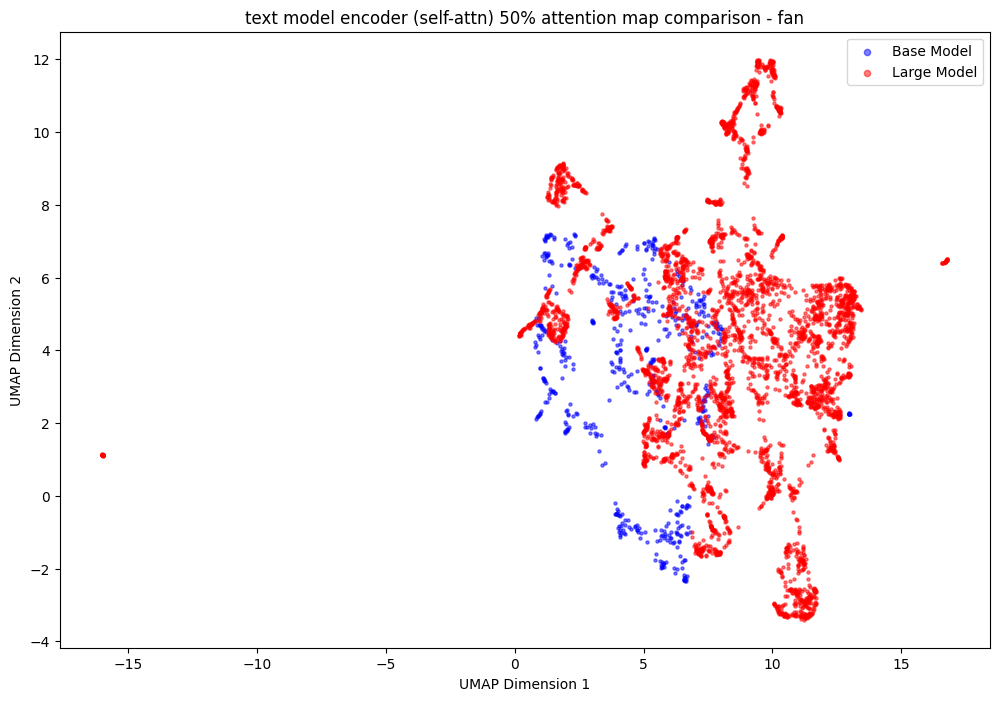

In [74]:
embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_llama = reduce_to_2d_umap(
    llama_model_tensors['fan']['vision']['transformer'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

plot_embeddings_2d(embedding_2d_large, embedding_2d_llama, title=r'text model encoder (self-attn) 50% attention map comparison - fan')

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


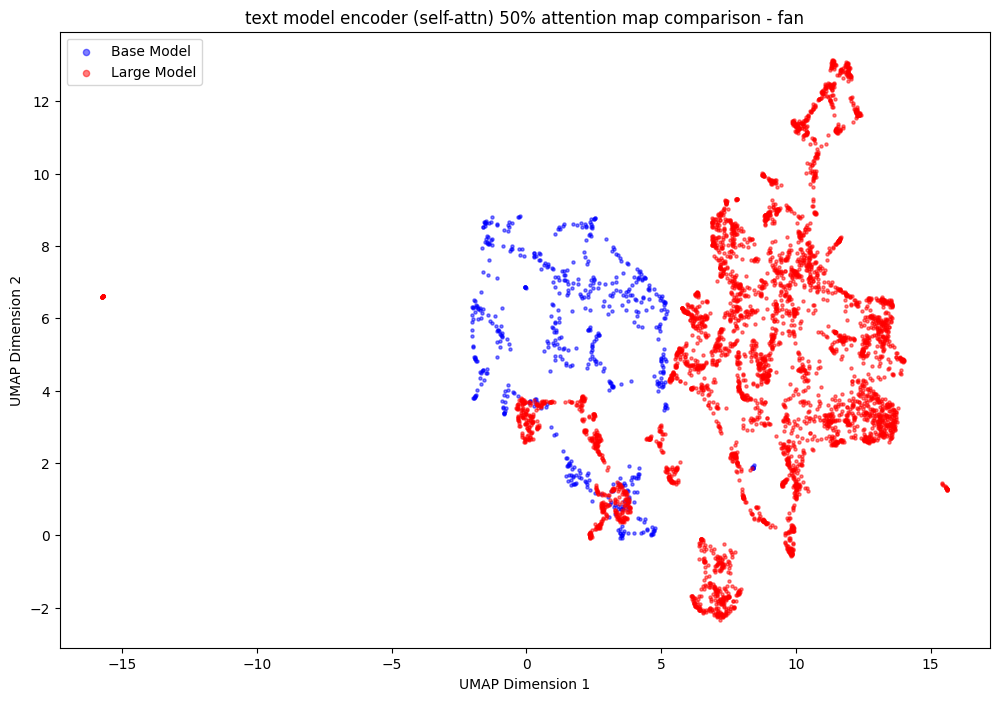

In [87]:
embedding_2d_large = reduce_to_2d_umap(
    large_model_tensors['fan']['self-attn'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

embedding_2d_llama = reduce_to_2d_umap(
    llama_model_tensors['fan']['vision']['transformer'], 
    n_neighbors=20,  # Example custom parameter
    min_dist=0.1     # Another example parameter
)

plot_embeddings_2d(embedding_2d_large, embedding_2d_llama, title=r'text model encoder (self-attn) 50% attention map comparison - fan')

---
Jan 27 revision to the idea

In [88]:
data_tensor = base_model_tensors['fan']['vision']

In [109]:
data_np = data_tensor.detach().cpu().squeeze(0).numpy()

In [ ]:
reducer = 

In [114]:
import umap 

In [118]:
reducer = umap.UMAP(n_components=2, 
                    n_neighbors=15,
                    min_dist=0.1,
                    random_state=42
                    )

In [111]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_np)


In [112]:
data_scaled

array([[-1.3125 ,  0.6885 , -3.451  , ...,  2.14   ,  2.098  ,  0.5317 ],
       [-0.2449 , -1.325  , -0.186  , ..., -2.227  ,  2.027  ,  0.8833 ],
       [-0.4    , -1.89   , -0.4297 , ..., -0.863  ,  0.8647 ,  0.3423 ],
       ...,
       [-0.01496,  0.752  , -0.261  , ...,  0.29   ,  1.35   ,  0.2556 ],
       [-0.05273,  0.984  , -0.573  , ...,  0.8594 ,  1.415  ,  1.61   ],
       [-0.3162 ,  0.8354 , -2.74   , ...,  0.10376,  1.107  ,  2.582  ]],
      dtype=float16)

In [113]:
data_scaled.shape

(9216, 256)

In [123]:
# fit UMAP to get a model for transforming the data
scaled_data_umap = reducer.fit(data_scaled)
scaled_data_umap

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [120]:
data_scaled.shape

(9216, 256)

In [121]:
data_scaled.data

In [128]:
reducer.transform(data_scaled.data) is reducer.transform(data_scaled)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


True

In [129]:
import numpy as np

In [130]:
embedding = reducer.transform(data_scaled.data)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(9216, 2)

In [131]:
scaled_embedding = reducer.transform(data_scaled)
scaled_embedding.shape

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(9216, 2)

In [132]:
original_embedding = reducer.transform(data_np)
original_embedding.shape

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


(9216, 2)

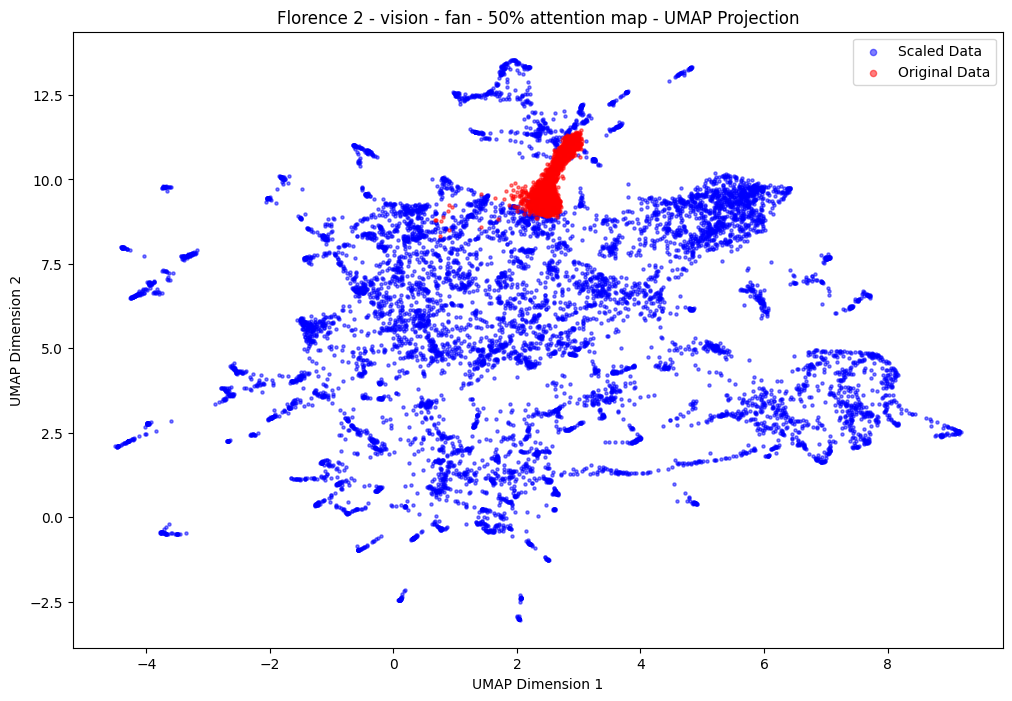

In [134]:
plot_embeddings_2d(scaled_embedding, original_embedding, labels=('Scaled Data', 'Original Data'),title=r"Florence 2 - vision - fan - 50% attention map - UMAP Projection")


In [135]:
def get_scaled_numpy_tensor(tensor):
    # tensor.shape = [1, 9216,512]
    np_arr = tensor.detach().cpu().squeeze(0).numpy()
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(np_arr)

    return data_scaled

In [139]:
# UMAP Projection object based on the base vision model tensor 
standardised_base_vision_fan = get_scaled_numpy_tensor(base_model_tensors['fan']['vision'])
standardised_base_vision_fan.shape

(9216, 256)

In [142]:
umap_reducer_object = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42)
umap_reducer_object

UMAP(random_state=42)

In [143]:
umap_reducer_object.fit(standardised_base_vision_fan)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=42, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [144]:
base_vision_fan_embedding = umap_reducer_object.transform(standardised_base_vision_fan)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [145]:
standardised_large_vision_fan = get_scaled_numpy_tensor(large_model_tensors['fan']['vision'])
standardised_large_vision_fan.shape

(9216, 512)

In [148]:
standardised_large_vision_fan

array([[-2.293  , -3.379  , -0.924  , ..., -2.174  , -4.715  , -0.065  ],
       [-0.698  , -1.341  ,  0.1038 , ..., -0.653  ,  1.53   , -0.7837 ],
       [-0.3215 ,  1.202  , -0.9087 , ..., -0.07983,  0.2698 , -1.827  ],
       ...,
       [-0.419  ,  0.3218 , -1.235  , ..., -0.7886 , -1.22   ,  0.7944 ],
       [ 0.1385 , -0.2947 , -2.125  , ..., -1.06   , -1.824  ,  1.209  ],
       [ 0.5903 , -1.359  , -1.817  , ..., -2.52   , -1.553  , -0.1848 ]],
      dtype=float16)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


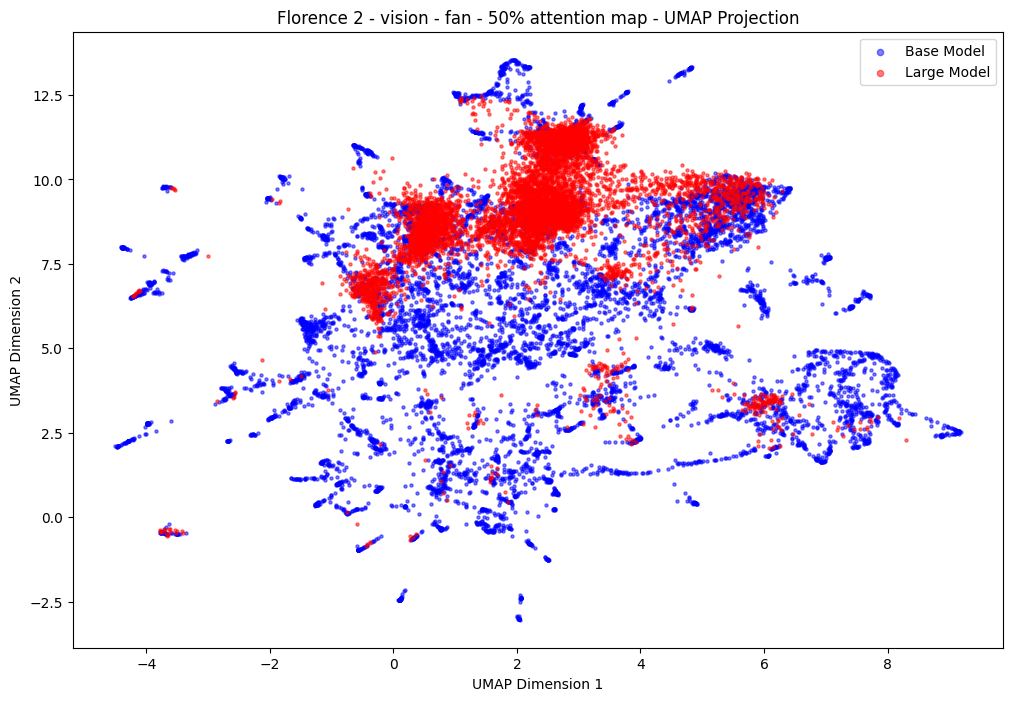

In [151]:
large_vision_fan_embedding = umap_reducer_object.transform(standardised_large_vision_fan)
plot_embeddings_2d(base_vision_fan_embedding, large_vision_fan_embedding, labels=('Base Model', 'Large Model'),title=r"Florence 2 - vision - fan - 50% attention map - UMAP Projection")

In [ ]:
large_vision_fan_embedding = umap_reducer_object.transform(standardised_large_vision_fan)

In [152]:
standardised_large_vision_fan.shape

(9216, 512)

In [153]:
standardised_large_vision_fan

array([[-2.293  , -3.379  , -0.924  , ..., -2.174  , -4.715  , -0.065  ],
       [-0.698  , -1.341  ,  0.1038 , ..., -0.653  ,  1.53   , -0.7837 ],
       [-0.3215 ,  1.202  , -0.9087 , ..., -0.07983,  0.2698 , -1.827  ],
       ...,
       [-0.419  ,  0.3218 , -1.235  , ..., -0.7886 , -1.22   ,  0.7944 ],
       [ 0.1385 , -0.2947 , -2.125  , ..., -1.06   , -1.824  ,  1.209  ],
       [ 0.5903 , -1.359  , -1.817  , ..., -2.52   , -1.553  , -0.1848 ]],
      dtype=float16)

In [ ]:
umap

In [164]:
standardised_large_vision_fan[:][:][:].shape

(9216, 512)

In [168]:
first_np_arr = standardised_large_vision_fan[:, 0:0+256]
second_np_arr = standardised_large_vision_fan[:, 128:128+256]
third_np_arr = standardised_large_vision_fan[:, 256:256+256]

In [169]:
first_np_arr.shape, second_np_arr.shape, third_np_arr.shape

((9216, 256), (9216, 256), (9216, 256))

In [170]:
first_np_embedding = umap_reducer_object.transform(first_np_arr)
second_np_embedding = umap_reducer_object.transform(second_np_arr)
third_np_embedding = umap_reducer_object.transform(third_np_arr)

/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


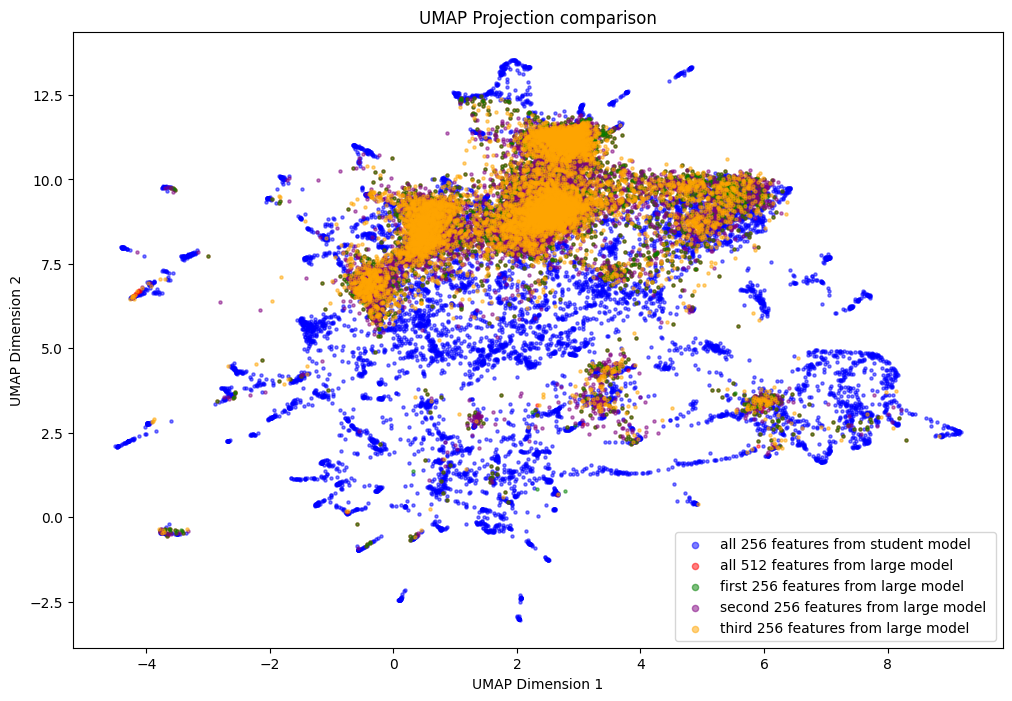

In [171]:
# Plot all 5 graphs in the same scatter plot

dot_transparency=0.5
dot_size=5
figsize=(12, 8)

plt.figure(figsize=figsize)
    
# Plot standarised base vision embedding
plt.scatter(base_vision_fan_embedding[:, 0], base_vision_fan_embedding[:, 1], 
            c='blue', label='all 256 features from student model ', 
            alpha=dot_transparency, s=dot_size)

# Plot standarised large vision embedding
plt.scatter(large_vision_fan_embedding[:, 0], large_vision_fan_embedding[:, 1], 
            c='red', label='all 512 features from large model ', 
            alpha=dot_transparency, s=dot_size)

# Plot first 256 features from large model
plt.scatter(first_np_embedding[:, 0], first_np_embedding[:, 1], 
            c='green', label='first 256 features from large model ', 
            alpha=dot_transparency, s=dot_size)

# Plot second 256 features from large model
plt.scatter(second_np_embedding[:, 0], second_np_embedding[:, 1], 
            c='purple', label='second 256 features from large model ', 
            alpha=dot_transparency, s=dot_size)

# Plot third 256 features from large model
plt.scatter(third_np_embedding[:, 0], third_np_embedding[:, 1], 
            c='orange', label='third 256 features from large model ', 
            alpha=dot_transparency, s=dot_size)


plt.title("UMAP Projection comparison")
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(markerscale=2)  # Make legend markers larger than points
plt.show()

In [167]:
standardised_large_vision_fan[:, 128:128+256].shape

(9216, 256)

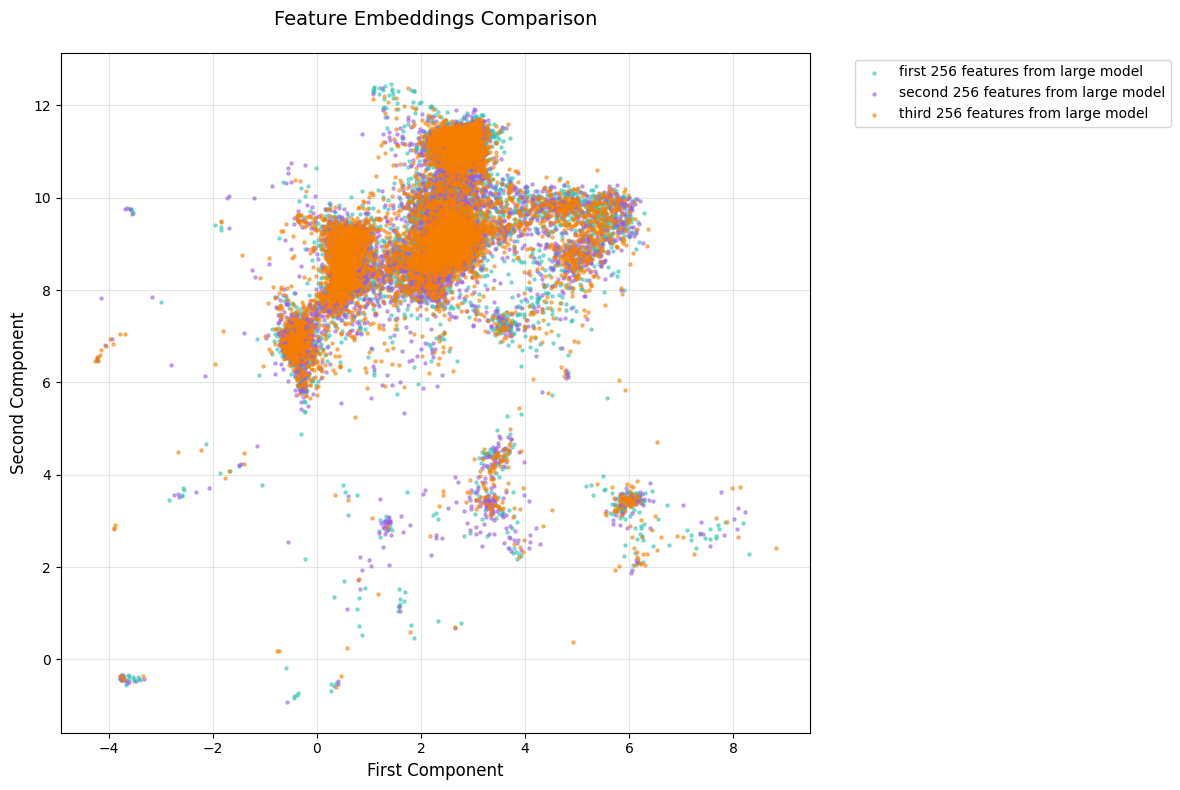

In [179]:
import matplotlib.pyplot as plt

# Create figure with white background
plt.figure(figsize=(12, 8), facecolor='white')

# Define a modern color palette
colors = {
    'student': '#4361EE',  # Rich blue
    # 'student':'blue',
    'large': '#E63946',    # Bright red
    'first': '#2EC4B6',    # Teal
    'second': '#9B5DE5',   # Soft purple
    'third': '#F77F00'     # Deep orange
}

showBaseFeatures = False
showAllLargeFeatures = False
if showBaseFeatures:


    # Create the scatter plots
    plt.scatter(base_vision_fan_embedding[:, 0], base_vision_fan_embedding[:, 1],
            c=colors['student'], label='all 256 features from student model',
            alpha=dot_transparency, s=dot_size)

if showAllLargeFeatures:
    plt.scatter(large_vision_fan_embedding[:, 0], large_vision_fan_embedding[:, 1],
            c=colors['large'], label='all 512 features from large model',
            alpha=dot_transparency, s=dot_size)

plt.scatter(first_np_embedding[:, 0], first_np_embedding[:, 1],
           c=colors['first'], label='first 256 features from large model',
           alpha=dot_transparency, s=dot_size)

plt.scatter(second_np_embedding[:, 0], second_np_embedding[:, 1],
           c=colors['second'], label='second 256 features from large model',
           alpha=dot_transparency, s=dot_size)

plt.scatter(third_np_embedding[:, 0], third_np_embedding[:, 1],
           c=colors['third'], label='third 256 features from large model',
           alpha=dot_transparency, s=dot_size)

# Enhance the plot appearance
plt.grid(True, alpha=0.2, color='gray')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Feature Embeddings Comparison', pad=20, fontsize=14)

# Add labels
plt.xlabel('First Component', fontsize=12)
plt.ylabel('Second Component', fontsize=12)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

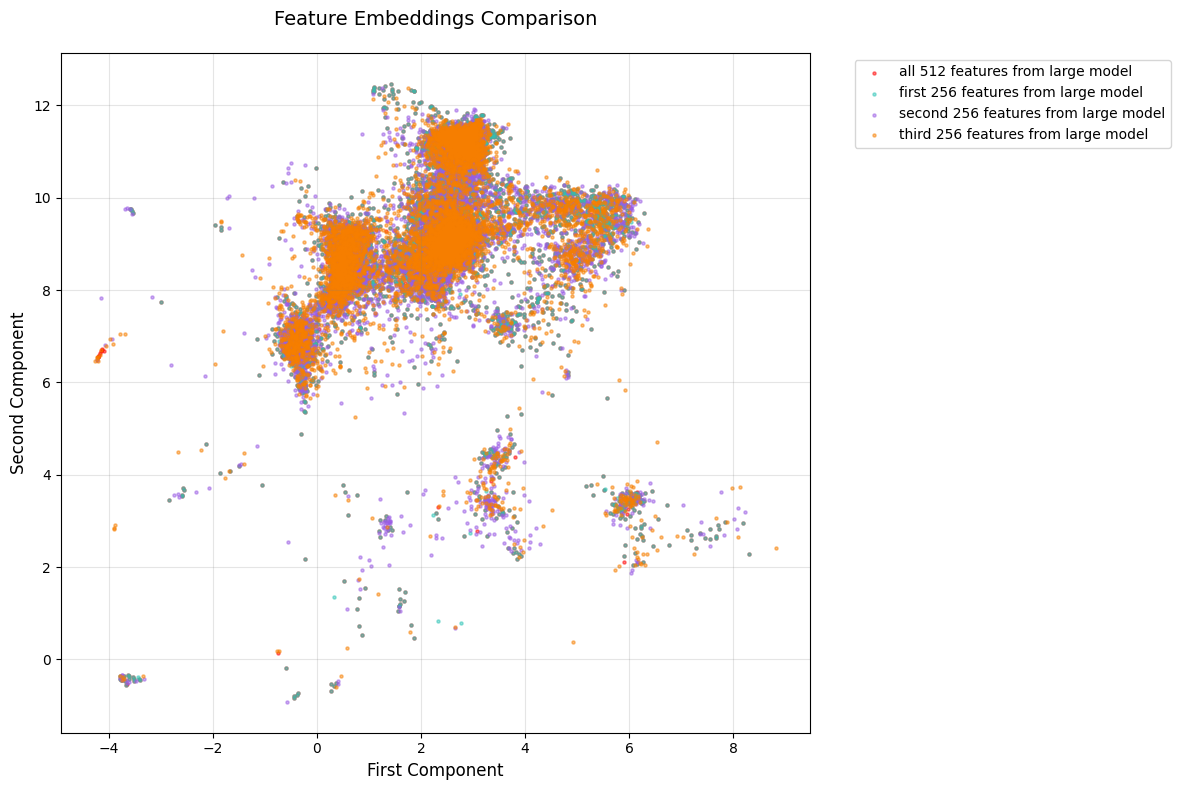

In [181]:
import matplotlib.pyplot as plt

# Create figure with white background
plt.figure(figsize=(12, 8), facecolor='white')

# Define a modern color palette
colors = {
    'student': '#4361EE',  # Rich blue
    # 'student':'blue',
    # 'large': '#E63946',    # Bright red
    'large':'red',
    'first': '#2EC4B6',    # Teal
    'second': '#9B5DE5',   # Soft purple
    'third': '#F77F00'     # Deep orange
}

showBaseFeatures = False
showAllLargeFeatures = True
if showBaseFeatures:


    # Create the scatter plots
    plt.scatter(base_vision_fan_embedding[:, 0], base_vision_fan_embedding[:, 1],
            c=colors['student'], label='all 256 features from student model',
            alpha=dot_transparency, s=dot_size)

if showAllLargeFeatures:
    plt.scatter(large_vision_fan_embedding[:, 0], large_vision_fan_embedding[:, 1],
            c=colors['large'], label='all 512 features from large model',
            alpha=dot_transparency, s=dot_size)

plt.scatter(first_np_embedding[:, 0], first_np_embedding[:, 1],
           c=colors['first'], label='first 256 features from large model',
           alpha=dot_transparency, s=dot_size)

plt.scatter(second_np_embedding[:, 0], second_np_embedding[:, 1],
           c=colors['second'], label='second 256 features from large model',
           alpha=dot_transparency, s=dot_size)

plt.scatter(third_np_embedding[:, 0], third_np_embedding[:, 1],
           c=colors['third'], label='third 256 features from large model',
           alpha=dot_transparency, s=dot_size)

# Enhance the plot appearance
plt.grid(True, alpha=0.2, color='gray')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Feature Embeddings Comparison', pad=20, fontsize=14)

# Add labels
plt.xlabel('First Component', fontsize=12)
plt.ylabel('Second Component', fontsize=12)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

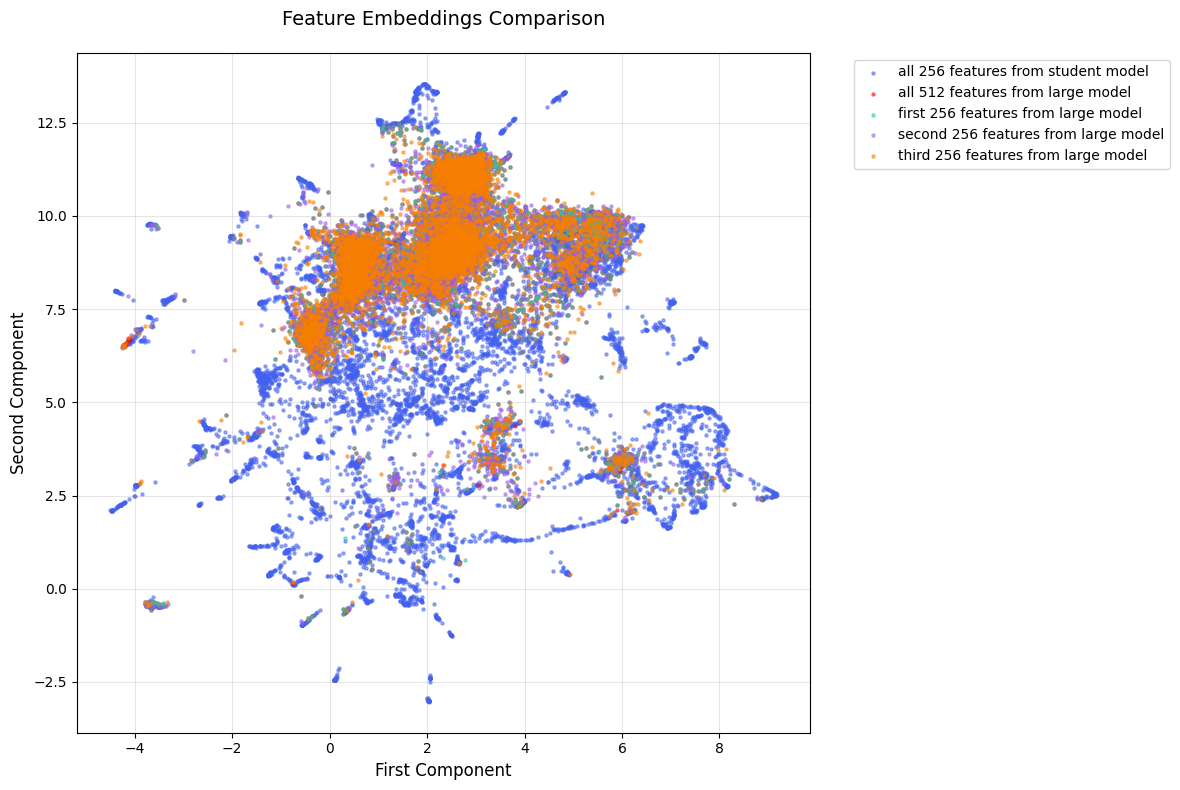

In [183]:
import matplotlib.pyplot as plt

# Create figure with white background
plt.figure(figsize=(12, 8), facecolor='white')

# Define a modern color palette
colors = {
    'student': '#4361EE',  # Rich blue
    # 'student':'blue',
    # 'large': '#E63946',    # Bright red
    'large':'red',
    'first': '#2EC4B6',    # Teal
    'second': '#9B5DE5',   # Soft purple
    'third': '#F77F00'     # Deep orange
}

showBaseFeatures = True
showAllLargeFeatures = True
if showBaseFeatures:


    # Create the scatter plots
    plt.scatter(base_vision_fan_embedding[:, 0], base_vision_fan_embedding[:, 1],
            c=colors['student'], label='all 256 features from student model',
            alpha=dot_transparency, s=dot_size)

if showAllLargeFeatures:
    plt.scatter(large_vision_fan_embedding[:, 0], large_vision_fan_embedding[:, 1],
            c=colors['large'], label='all 512 features from large model',
            alpha=dot_transparency, s=dot_size)

plt.scatter(first_np_embedding[:, 0], first_np_embedding[:, 1],
           c=colors['first'], label='first 256 features from large model',
           alpha=dot_transparency, s=dot_size)

plt.scatter(second_np_embedding[:, 0], second_np_embedding[:, 1],
           c=colors['second'], label='second 256 features from large model',
           alpha=dot_transparency, s=dot_size)

plt.scatter(third_np_embedding[:, 0], third_np_embedding[:, 1],
           c=colors['third'], label='third 256 features from large model',
           alpha=dot_transparency, s=dot_size)

# Enhance the plot appearance
plt.grid(True, alpha=0.2, color='gray')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Feature Embeddings Comparison', pad=20, fontsize=14)

# Add labels
plt.xlabel('First Component', fontsize=12)
plt.ylabel('Second Component', fontsize=12)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# For Text Encoder 

In [184]:
# UMAP Projection object based on the base vision model tensor 
standardised_base_text_fan = get_scaled_numpy_tensor(base_model_tensors['fan']['self-attn'])
standardised_base_text_fan.shape

(584, 768)